In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integ #trapz, cumtrapz, quad
from scipy.interpolate import lagrange
plt.style.use('seaborn-poster')

In [ ]:
def my_poly_int(x, y):
    poly = lagrange(x, y)
    XData = np.array([x])
    I_trapz = integ.trapz(poly, XData)
    poly_str = ''
    for i in range(len(x)):
        if i == len(x) - 1:
            poly_str += str('{:.3}'.format(poly[i])) + 'x^' + str(i)
            break
        poly_str += str('{:.3}'.format(poly[i])) + 'x^' + str(i) + ' + '
    dict_import = {'polynom': poly_str, 'Integral': float(I_trapz)}
    return dict_import

In [ ]:
x = [0, 1, 2, 3, 4, 5]
y = [1, 9, 7, 2, 5, 19]
dictionary = my_poly_int(x, y)
print('Integral: ', dictionary['Integral'], '\n', 'Interpolation polynom: ', dictionary['polynom'])

Integral:  8.549999999999999 
 Interpolation polynom:  1.0x^0 + 11.9x^1 + -1.67x^2 + -3.33x^3 + 1.17x^4 + -0.1x^5


# Task 5

In [ ]:
def my_fourier_coef(f, n):
    x = np.linspace(- np.pi, np.pi, 1000)
    Coef = np.zeros([n, 2])
    error = 0
    f_cos = lambda x: np.cos(n * x) * f(x)
    f_sin = lambda x: np.sin(n * x) * f(x)
    An, error = integ.quad(f_cos, - np.pi, np.pi)
    Bn, error = integ.quad(f_sin, - np.pi, np.pi)
    An = An / np.pi
    Bn = Bn / np.pi
    return np.array([An, Bn])

In [ ]:
def plot_results(f, N):
    x = np.linspace(- np.pi, np.pi, 10000)
    [A0, B0] = my_fourier_coef(f, 0)
    y = A0 * np.ones(len(x)) / 2
    for n in range(1, N):
        [An, Bn] = my_fourier_coef(f, n)
        y += An * np.cos(n * x) + Bn * np.sin(n * x)
    plt.figure(figsize = (10,6))
    plt.plot(x, f(x), label = 'analytic')
    plt.plot(x, y, label = 'approximate')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid()
    plt.legend()
    plt.title(f'{N}th Order Fourier Approximation')
    plt.show()

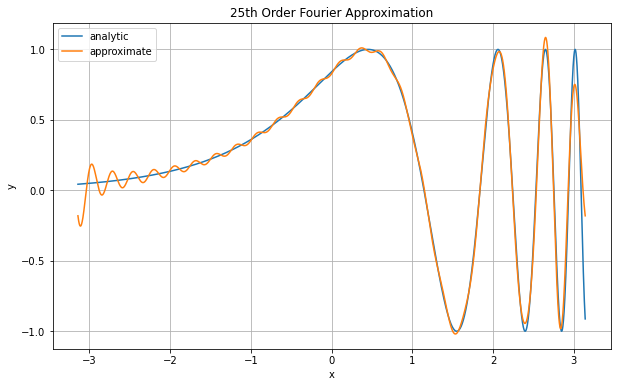

In [ ]:
f = lambda x: np.sin(np.exp(x))
N = 25
plot_results(f, N)

# Task 1

In [ ]:
def my_int_calc(f,a,b,N,option):
    x = np.linspace(a,b,N)
    h = (b-a)/(N-1)
    Int = 0
    If = np.zeros(N-1)
    if option == 'rect':
        If[0:N-1] = h*f((x[1:N] + x[0:N-1])/2)
    elif option == 'trap':
        If[0:N-1] = h*(f(x[1:N]) + f(x[0:N-1]))/2
    elif option == 'simp':
        x_s = np.linspace(a,b,2*N)
        for i in range(N-1):
            If[i] = h*(f(x_s[2*i+2]) + 4*f(x_s[2*i+1]) + f(x_s[2*i]))/6
    for i in range(N-1):
        Int += If[i]
    return Int

In [ ]:
x_new = np.linspace(0,np.pi,100)
f = lambda x: np.sin(x)
Rect = my_int_calc(f,0,np.pi,10,'rect')
Trap = my_int_calc(f,0,np.pi,10,'trap')
Simp = my_int_calc(f,0,np.pi,10,'simp')
print('Analytic: 2')
print('Rectangles: %f' %Rect)
print('Trapetion: %f' %Trap)
print('Simpson: %f' %Simp)

Analytic: 2
Rectangles: 2.010190
Trapetion: 1.979651
Simpson: 2.096723
